In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv("C:\\Users\\manje\\OneDrive\\Desktop\\pradhanmatri\\student.csv")
print(data.shape)
print(data.head())

(1000, 3)
   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62


In [5]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

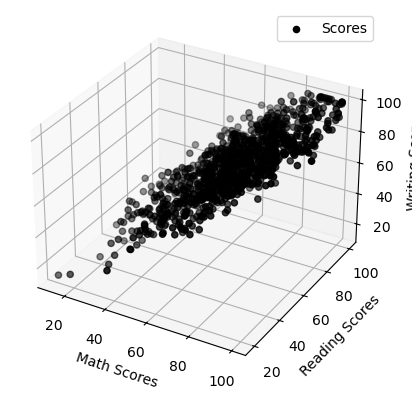

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(math, read, write, color='black')
ax.set_xlabel('Math Scores')
ax.set_ylabel('Reading Scores')
ax.set_zlabel('Writing Scores')
plt.legend(['Scores'])
plt.show()

In [9]:
m = len(math)
X = np.column_stack((np.ones(m), math, read))  # Adding intercept term
Y = write
alpha = 0.0001

In [11]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2) / (2 * m)
    return J

In [13]:
B = np.zeros(3)
initial_cost = cost_function(X, Y, B)
print("Initial Cost:", initial_cost)

Initial Cost: 2470.11


In [15]:
def gradient_descent(X, Y, B, alpha, iterations):
    m = len(Y)
    cost_history = np.zeros(iterations)
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B -= alpha * gradient
        cost_history[iteration] = cost_function(X, Y, B)
    return B, cost_history

In [18]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)
print("New Coefficients:", newB)
print("Final Cost:", cost_history[-1])

New Coefficients: [-0.80486491  0.09290692  0.9044486 ]
Final Cost: 10.464353346630043


In [20]:
def rmse(Y, Y_pred):
    return np.sqrt(np.sum((Y - Y_pred) ** 2) / len(Y))

In [22]:
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

In [24]:
Y_pred = X.dot(newB)
print("R2 Score:", r2_score(Y, Y_pred))

R2 Score: 0.9098151474045941
